<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
<h1><center>Fast-Food Restaurants DataAnalysis</center></h1>                                         
<h2 align="center">Exploratory Data Analysis</h2>
<h3 align="center">Term 1 - Project</h3>
<h4 align="right">*By - Sudeep Raj ( sudeep48raj93@gmail.com )*</h4>  

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Initial observations](#section306)<br/>
    - 3.7 [Final observations](#section307)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Standardize column headers to lower case](#section401)<br/>
    - 4.2 [Missing data and its imputation](#section402)<br/>
    - 4.3 [Remove punctuation on Name column](#section403)<br/>
- 5. [Analysis through questions](#section5)</br>
    - 5.1 [Which city in US having the highest number of restaurants?](#section501)<br/>
    - 5.2 [Which province in US having the highest number of restaurants?](#section502)<br/>
    - 5.3 [Which are the top restaurants in US?](#section503)<br/>
    - 5.4 [Which zone in US having highest number of restaurants?](#section504)<br/>
- 6. [Conclusion](#section6)<br/>

<a id=section1></a> 
## 1. Problem Statement !

"The __Fast Food Restaurants__ dataset we are analysing and providing __Ranking of Top City having Fast Food Restaurants in United States of America__"

<a id=section101></a> 
### 1.1. Introduction
In the Exploratory Data Analysis we are using Python skills on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis. 

<a id=section2></a> 
### 2. Load the packages and data 

In [21]:
import sys                                                                      
import pandas as pd
import seaborn as sns
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import string
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)     

df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/FastFoodRestaurants.csv')      

<a id=section3></a> 
### 3. Data Profiling

Reviewing the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

In [22]:
df.dtypes

address        object
city           object
country        object
keys           object
latitude      float64
longitude     float64
name           object
postalCode     object
province       object
websites       object
dtype: object

In [23]:
df.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [24]:
df.describe(include='all')

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
count,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000,9535
unique,9934,2775,1,10000,NaN,NaN,548,5289,52,3821
top,3900 Las Vegas Blvd S,Cincinnati,US,us/ga/flowerybranch/7348spoutspringsrd/-791445730,NaN,NaN,McDonald's,57701,CA,"http://mcdonalds.com,http://www.mcdonalds.com/..."
freq,3,119,10000,1,NaN,NaN,1886,23,676,1074
mean,NaN,NaN,NaN,NaN,37.552195,-91.056132,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,5.050275,18.556339,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-6.244273,-159.378915,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,34.028706,-97.412631,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,38.298217,-87.660930,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,41.116765,-81.458351,NaN,NaN,NaN,NaN


In [25]:
df.sample(10)

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
7044,805 Taylor Ave,Towson,US,us/md/towson/805taylorave/-109138799,39.386395,-76.578865,Fab Wings N Burgers,21286,MD,NaN
1159,5449 S Highway 27,Somerset,US,us/ky/somerset/5449shighway27/-791445730,37.018665,-84.627870,Wendy's,42501,KY,http://www.wendys.com
9437,55510 Kamehameha Hwy,Laie,US,us/hi/laie/55510kamehamehahwy/-864103396,21.659513,-157.939380,Taco Bell,96762,HI,https://locations.tacobell.com/hi/laie/55-510-...
7195,10575 NW 41st St,Miami,US,us/fl/miami/10575nw41stst/1020328116,25.812042,-80.367850,Pollo Tropical,33178,FL,"http://pollotropical.com,http://pollotropical...."
235,31305 Vine St,Eastlake,US,us/oh/eastlake/31305vinest/-2061630068,41.642781,-81.468481,Burger King,44095,OH,http://www.bk.com
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.351550,-82.097280,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."
4337,2660 Florida St,Mandeville,US,us/la/mandeville/2660floridast/1022731434,30.368711,-90.072235,Isabella's Pizzeria,70448,LA,http://www.isabellaspizzeria.net
2035,1000 S Central Ave,Marshfield,US,us/wi/marshfield/1000scentralave/106088,44.658700,-90.180000,KFC,54449,WI,http://www.kfc.com
9821,1346 N Eisenhower Dr,Beckley,US,us/wv/beckley/1346neisenhowerdr/696490760,37.803430,-81.182030,Hardee's,25801,WV,http://www.hardees.com
4966,2207 Bel Pre Rd,Silver Spring,US,us/md/silverspring/2207belprerd/-1161002137,39.090900,-77.047100,McDonald's,20906,MD,"http://mcdonalds.com,http://www.mcdonalds.com/..."


In [26]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="fastfoodRestaurant_before_preprocessing.html")

<a id=section306></a> 
### 3.6. Initial observations:

- Summary of data types in this dataset:
 - <em>float64</em>: <strong>Latitude</strong>      
 - <em>float64</em>: <strong>Longitude</strong>     
 - <em>Object</em>: Everything else
- <strong>Name</strong> : We found there are spelling mistakes(upper, lower and punctuation) on name column, we can group similar names. 
- <strong>Keys</strong> : We noticed keys include country, province, city and address were present, all keys are considered as unique.
- <strong>Websites</strong> : We have 465 websites missing.

Other than Websites we don't have any missing data.

<a id=section307></a> 
### 3.7. Final observations 

- Variables to transform prior to analysis:
 - Standardize all column headers to lower case (to prevent typos!)
- Created 4 Zones with respect to province.

<a id=section4></a> 
### 4. Data Normalization

### 4.1. Standardize all column headers to lower case 

In [27]:
df.columns = map(str.lower, df.columns)                                  
df.dtypes  

address        object
city           object
country        object
keys           object
latitude      float64
longitude     float64
name           object
postalcode     object
province       object
websites       object
dtype: object

<a id=section402></a>
### 4.2. Missing Data and its imputation

In [28]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

            Total  Percent
websites      465   0.0465
province        0   0.0000
postalcode      0   0.0000
name            0   0.0000
longitude       0   0.0000
latitude        0   0.0000
keys            0   0.0000
country         0   0.0000
city            0   0.0000
address         0   0.0000


We are not deleating the missing columns of websites, If we delete the column then we might loose data of other details.

<a id=section403></a>
### 4.3. Remove punctuation on Name column

In [29]:
df.name.value_counts()[:10]

McDonald's        1886
Burger King       1154
Taco Bell          873
Wendy's            731
Arby's             518
KFC                421
Domino's Pizza     345
Subway             322
SONIC Drive In     226
Hardee's           192
Name: name, dtype: int64

In [30]:
df.name=df.name.apply(lambda x: x.lower())
df.name=df.name.apply(lambda x:''.join([i for i in x 
                            if i not in string.punctuation]))

df.name.value_counts()[:10]

mcdonalds          2105
burger king        1154
taco bell           873
wendys              734
arbys               520
kfc                 441
subway              404
dominos pizza       359
sonic drive in      248
jack in the box     201
Name: name, dtype: int64

#### Observations:
In the __Name column__ we can see that earlier there were many similar name observed, i.e, some differentiated with upper case, lower case and punctuation. 
Example: __McDonald's__ count was __1886__ and now after removal of punctuation we can observe the count of __mcdonalds__ is __2105__.

<a id=section5></a> 
### 5. Analysis through questions

<a id=section501></a>
### 5.1. Which city in US having the highest number of restaurants?

Text(0,0.5,'count')

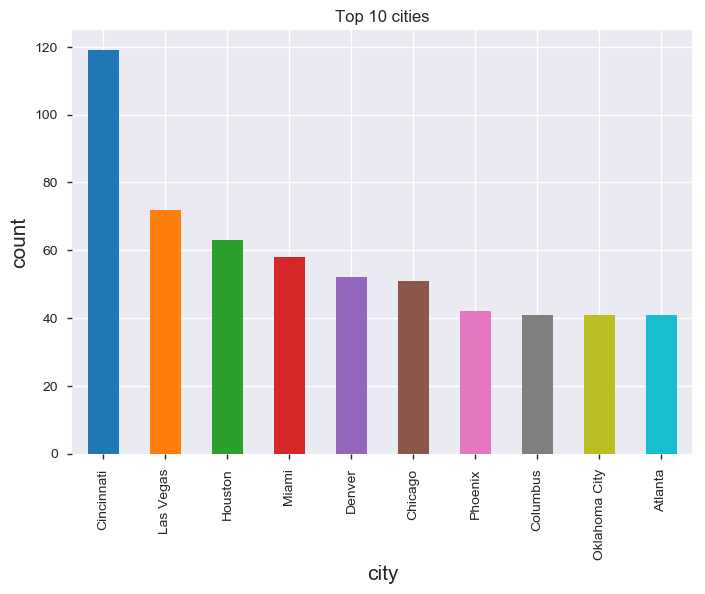

In [31]:
cityplt=df.city.value_counts()[:10].plot.bar(title='Top 10 cities')
cityplt.set_xlabel('city',size=15)
cityplt.set_ylabel('count',size=15)

#### Observations:
From Bar Graph we are observing Top 10 Cities, __Cincinnati City in Ohio__ being the Top ranking in US having highest number of restaurants.<br> 
Between 50 - 70 count we can see 5 Cities __Las Vegas, Houston, Miami, Denver and Chicago__.<br>
Between 40 - 42 count we have Cities having around similar number of Restaurants __Phoenix, Columbus, Oklahoma City and Atlanta__.

<a id=section502></a>
### 5.2. Which province in US having the highest number of restaurants?

Text(0,0.5,'count')

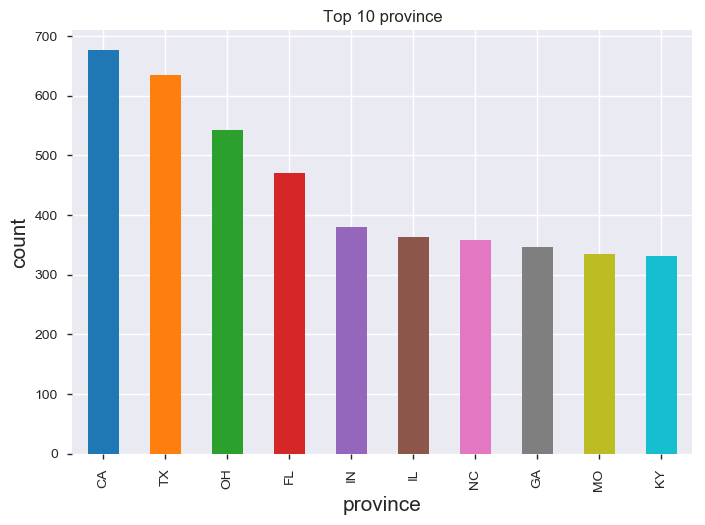

In [32]:
provplt=df.province.value_counts()[:10].plot.bar(title='Top 10 province')
provplt.set_xlabel('province',size=15)
provplt.set_ylabel('count',size=15)

#### Observations:
From Bar Graph we are observing Top 10 Provinces, __CA (California)__ state being the Top ranking in US having highest number of restaurants.<br> 
__TX (Texas)__ being the __second highest__ in US, both states come under range of 600 - 700 restaurants count.  
__OH (Ohio)__ being the __third highest__ in US, even we have __observed in the above City graph Cincinnati in Ohio being the highest__. <br>
If we look between the range of 300 - 400, we can observe 6 states come under the same.

<a id=section503></a>
### 5.3. Which are the top restaurants in US?

Text(0,0.5,'count')

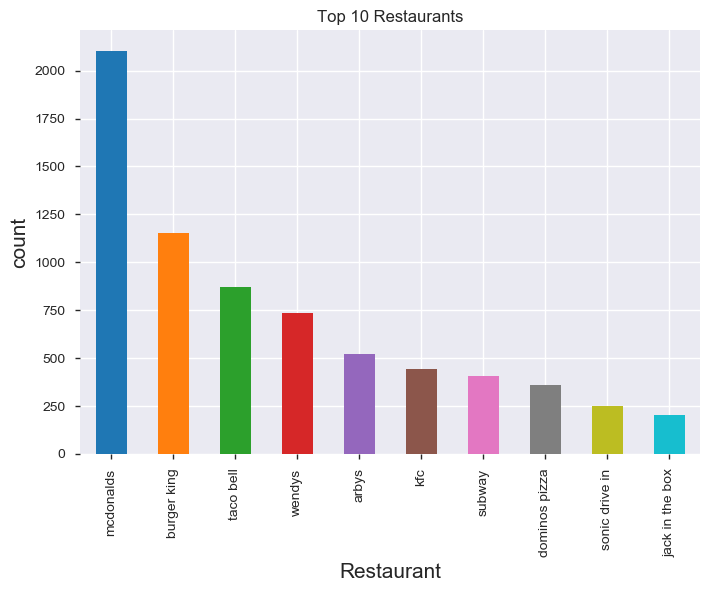

In [33]:
nameplt=df.name.value_counts()[:10].plot.bar(title="Top 10 Restaurants")
nameplt.set_xlabel('Restaurant',size=15)
nameplt.set_ylabel('count',size=15)

In [34]:
mapbox_access_token='pk.eyJ1IjoibmF2ZWVuOTIiLCJhIjoiY2pqbWlybTc2MTlmdjNwcGJ2NGt1dDFoOSJ9.z5Jt4XxKvu5voCJZBAenjQ'

In [35]:
mcd=df[df.name =='mcdonalds']
mcd_lat = mcd.latitude
mcd_lon = mcd.longitude
mcd_city = mcd.city

data = [
    go.Scattermapbox(
        lat=mcd_lat,
        lon=mcd_lon,
        mode='markers',
        marker=dict(
            size=5,
            color='rgb(255, 0, 0)',
            opacity=0.8
        ))]
layout = go.Layout(
    title='Mcdonalds Restaurants',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='Mcdonalds restaurants')

In [36]:
bg=df[df.name =='burger king']
bg_lat = bg.latitude
bg_lon = bg.longitude
bg_city = bg.city

data = [
    go.Scattermapbox(
        lat=bg_lat,
        lon=bg_lon,
        mode='markers',
        marker=dict(
            size=5,
            color='rgb(0,255, 0)',
            opacity=0.8
        ))]
layout = go.Layout(
    title='Burgerking Restaurants',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='burgerking restaurants')

#### Observations:
From Bar Graph we are observing Top 10 Restaurants, __McDonalds__ being the Top ranking in US having highest number of fast food restaurants,  __count__ is __2105__.<br> 
__Burger King__ being the __second highest__ in US, restaurant __count__ is __1154__.  

<a id=section504></a>
### 5.4.  Which zone in US having highest number of restaurants?

In [38]:
df['text'] = df['name'] + ',' + df['province'] + ', ' + df['country']

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['text'],
        mode = 'markers',
        marker = dict(
            size = 4,
            opacity = 0.5,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=.5,
                color='rgba(102, 102, 102)'
            )))]
layout = dict(
        title = 'Restaurants across the country',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='all restaurants' )


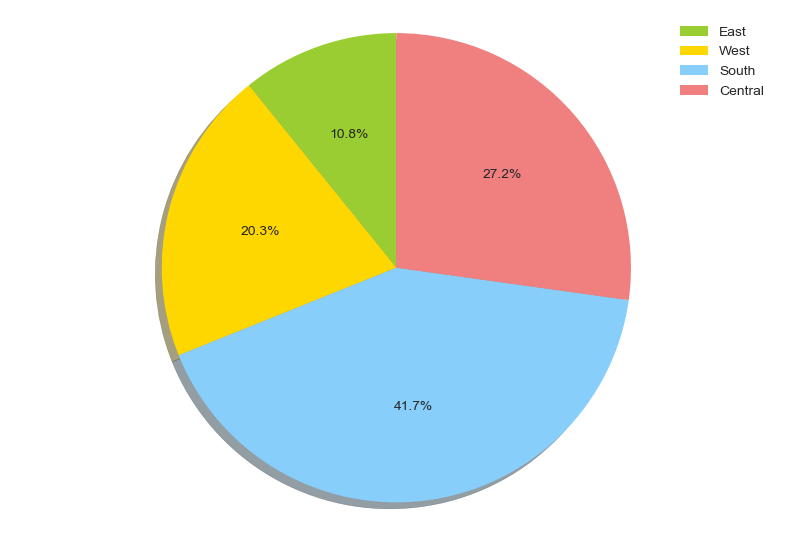

In [39]:
# Differentiated province into four zone as per US list.
east_zone = ["CT", "MA", "ME", "NH", "NJ", "NY", "PA", "RI", "VT", "Co Spgs"]
west_zone = ["AK", "AZ", "CA", "CO", "HI", "ID", "MT", "NM", "NV", "OR", "UT", "WA", "WY"]
south_zone = ["AL", "AR", "DC", "DE", "FL", "GA", "KY", "LA", "MD", "MS", "NC", "OK", "SC", "TN", "TX", "VA", "WV"]
central_zone = ["IA", "IL", "IN", "KS", "MI", "MN", "MO", "ND", "NE", "OH", "SD", "WI"] 
 
def zone_count(zone):
    zone_dict = {}
    for city in list(df.province):
        if city in zone:
            if city not in zone_dict: 
                zone_dict[city] = 1
            else:
                count = zone_dict[city]
                count = count + 1
                zone_dict[city] = count
    zone_count = 0
    for city in zone_dict.keys():
        zone_count = zone_count + zone_dict[city]

    return zone_count
           
east = zone_count(east_zone)
west = zone_count(west_zone)
south = zone_count(south_zone)
central = zone_count(central_zone)

labels = ['East', 'West', 'South', 'Central']
sizes = [east, west, south, central]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts, junk = plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%.1f%%')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Observations:
From Pie chart we are analysing the __4 Zones in US__, __South Zone__ being the Top ranking in US having highest number of fast food restaurants, If we check the __Percentage__ is __41.7%__.<br> 
__West & Central Zone__ being almost similar __20.3% & 27.2%__ restaurant in US. Being __Central Zone__ the second highest. 

<a id=section6></a>
### 6. Conclusion

- The __Fast Food Restaurant__ Survrey being conducted in __US__ to helps and understant the place where the Fast food is highly consumed. By removing the punctuation on Name column we came to know that __Mc Donald's__ count being the highest.(__From: Section 4.3__)
- __Cincinnati City in Ohio__ being the Top ranking in US having highest number of restaurants.(__From: Section 5.1__)
- __CA (California)__ state being the Top ranking in US having highest number of restaurants.__TX (Texas)__ being the __second highest__ in US, both states come under range of 600 - 700 restaurants count.  (__From: Section 5.2__)
- __McDonalds__ being the Top ranking in US having highest number of fast food restaurants,  __count__ is __2105__. __Burger King__ being the __second highest__ in US, restaurant __count__ is __1154__.(__From: Section 5.3__)
- If we compare __4 Zones in US__, __South Zone__ being the Top ranking in US having highest number of fast food restaurants __41.7%__. __East Zone__ having __10.8%__ Fast Food restaurant in US, they are less eating Fast Food people rather than __South Zone__.